<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/face_detection_mtcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.3 MB/s eta 0:00:00


In [2]:
# Download and unzip dataset
!pip install --upgrade gdown
!gdown --fuzzy 1RJ6MEDV9tYexOTAQDiWZ2bx8fO4HuUAu
!unzip -q "5celeb.zip"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1RJ6MEDV9tYexOTAQDiWZ2bx8fO4HuUAu
To: /content/5celeb.zip
100% 2.73M/2.73M [00:00<00:00, 155MB/s]


In [3]:
import mtcnn
from mtcnn import MTCNN

import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pprint import pprint

In [4]:
path = './5celeb/data/*/*/*.jpg'

In [16]:
# list pic_path
img_paths = glob(path)
print(len(glob(path)))
img_paths

137


['./5celeb/data/val/madonna/httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg',
 './5celeb/data/val/madonna/httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg',
 './5celeb/data/val/madonna/httpecximagesamazoncomimagesIfmaBKWLACULSRjpg.jpg',
 './5celeb/data/val/madonna/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmadonnatalksparisattackstearsjpg.jpg',
 './5celeb/data/val/madonna/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg',
 './5celeb/data/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnstillstandingbrooklynnewyearsjpg.jpg',
 './5celeb/data/val/elton_john/httpcdnlyricssongonlyricsnetwpcontentuploadsEltonJohnDiscographyCDreleasesjpg.jpg',
 './5celeb/data/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnsupportsbrucejennerstransitiontowomanjpg.jpg',
 './5celeb/data/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnemmysperformancew

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# create the detector, using default weights
detector = MTCNN()

In [17]:
# read image
img = cv2.imread(img_paths[135])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# detect face
results = detector.detect_faces(img)

pprint(results)


1/1 [==============================] - 0s 37ms/step
[{'box': [329, 56, 181, 277],
  'confidence': 0.999979555606842,
  'keypoints': {'left_eye': (371, 170),
                'mouth_left': (370, 256),
                'mouth_right': (462, 255),
                'nose': (413, 232),
                'right_eye': (456, 170)}}]


(329, 56) (510, 333) (451, 800, 3)


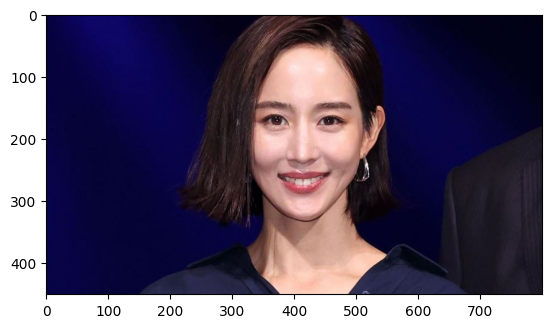

In [18]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height
print((x1, y1), (x2, y2), img.shape)
plt.imshow(img)

1/1 [==============================] - 0s 48ms/step
302 487 100 351


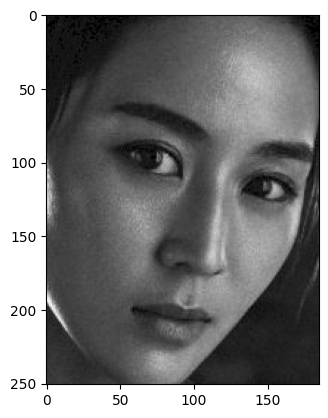

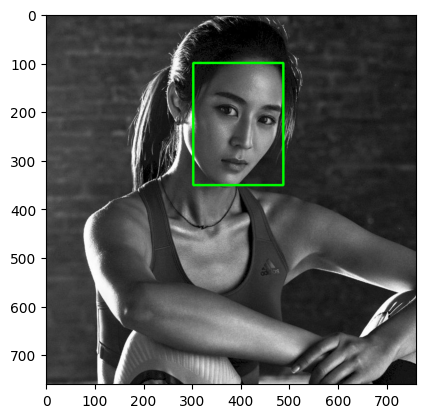

1/1 [==============================] - 0s 28ms/step
655 955 225 618


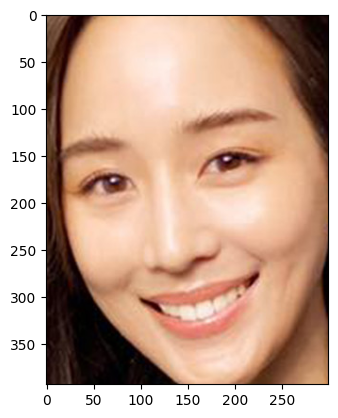

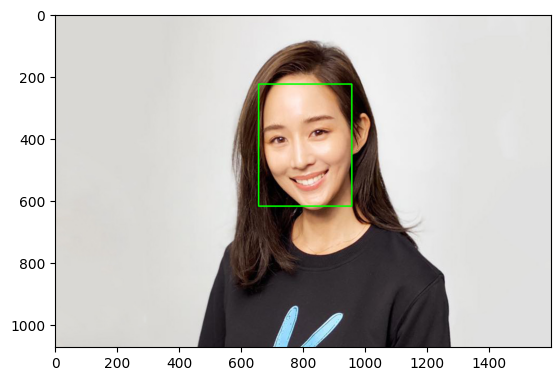

1/1 [==============================] - 0s 36ms/step
329 510 56 333


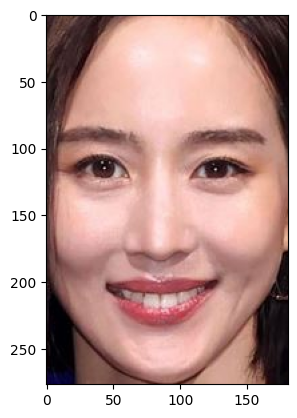

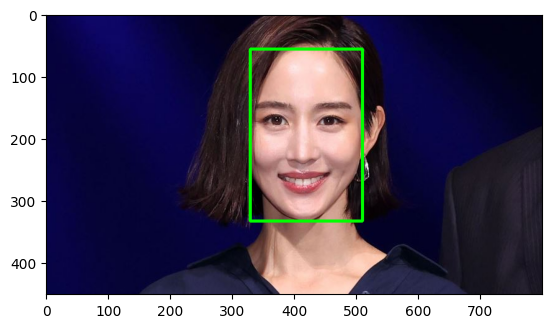

1/1 [==============================] - 0s 29ms/step
655 955 225 618


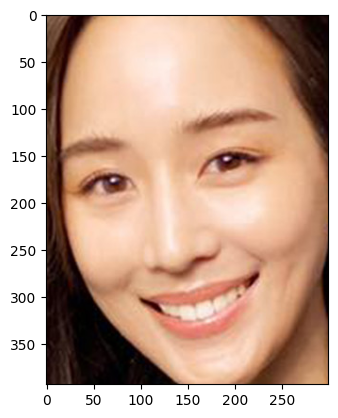

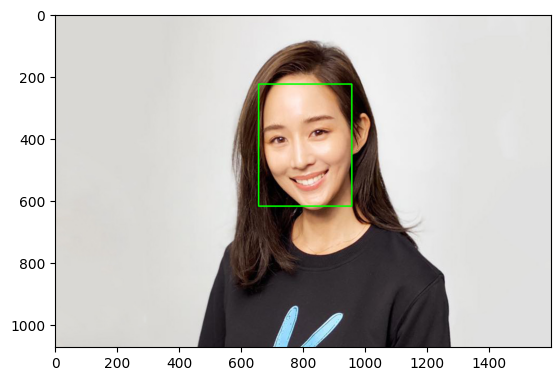

1/1 [==============================] - 0s 35ms/step
329 510 56 333


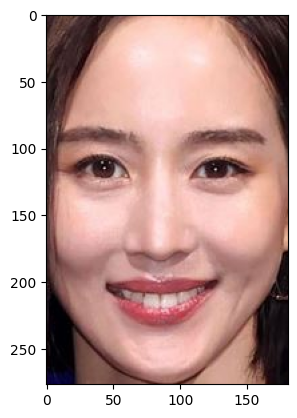

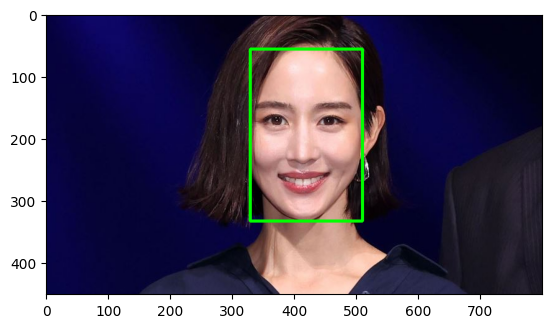

In [20]:
for path in np.random.choice(img_paths[133:], 5):
    # read image
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # detect face
    results = detector.detect_faces(img)
    # extract the bounding box from the first face
    assert len(results) >= 1
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height

    print(x1, x2, y1, y2)
    # crop face
    patch = img[max(y1, 0):y2, max(x1, 0):x2].copy()
    # draw bbox
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # show image
    plt.imshow(patch)
    plt.show()
    plt.imshow(img)
    plt.show()